time elapsed =  0.706302714348 minutes


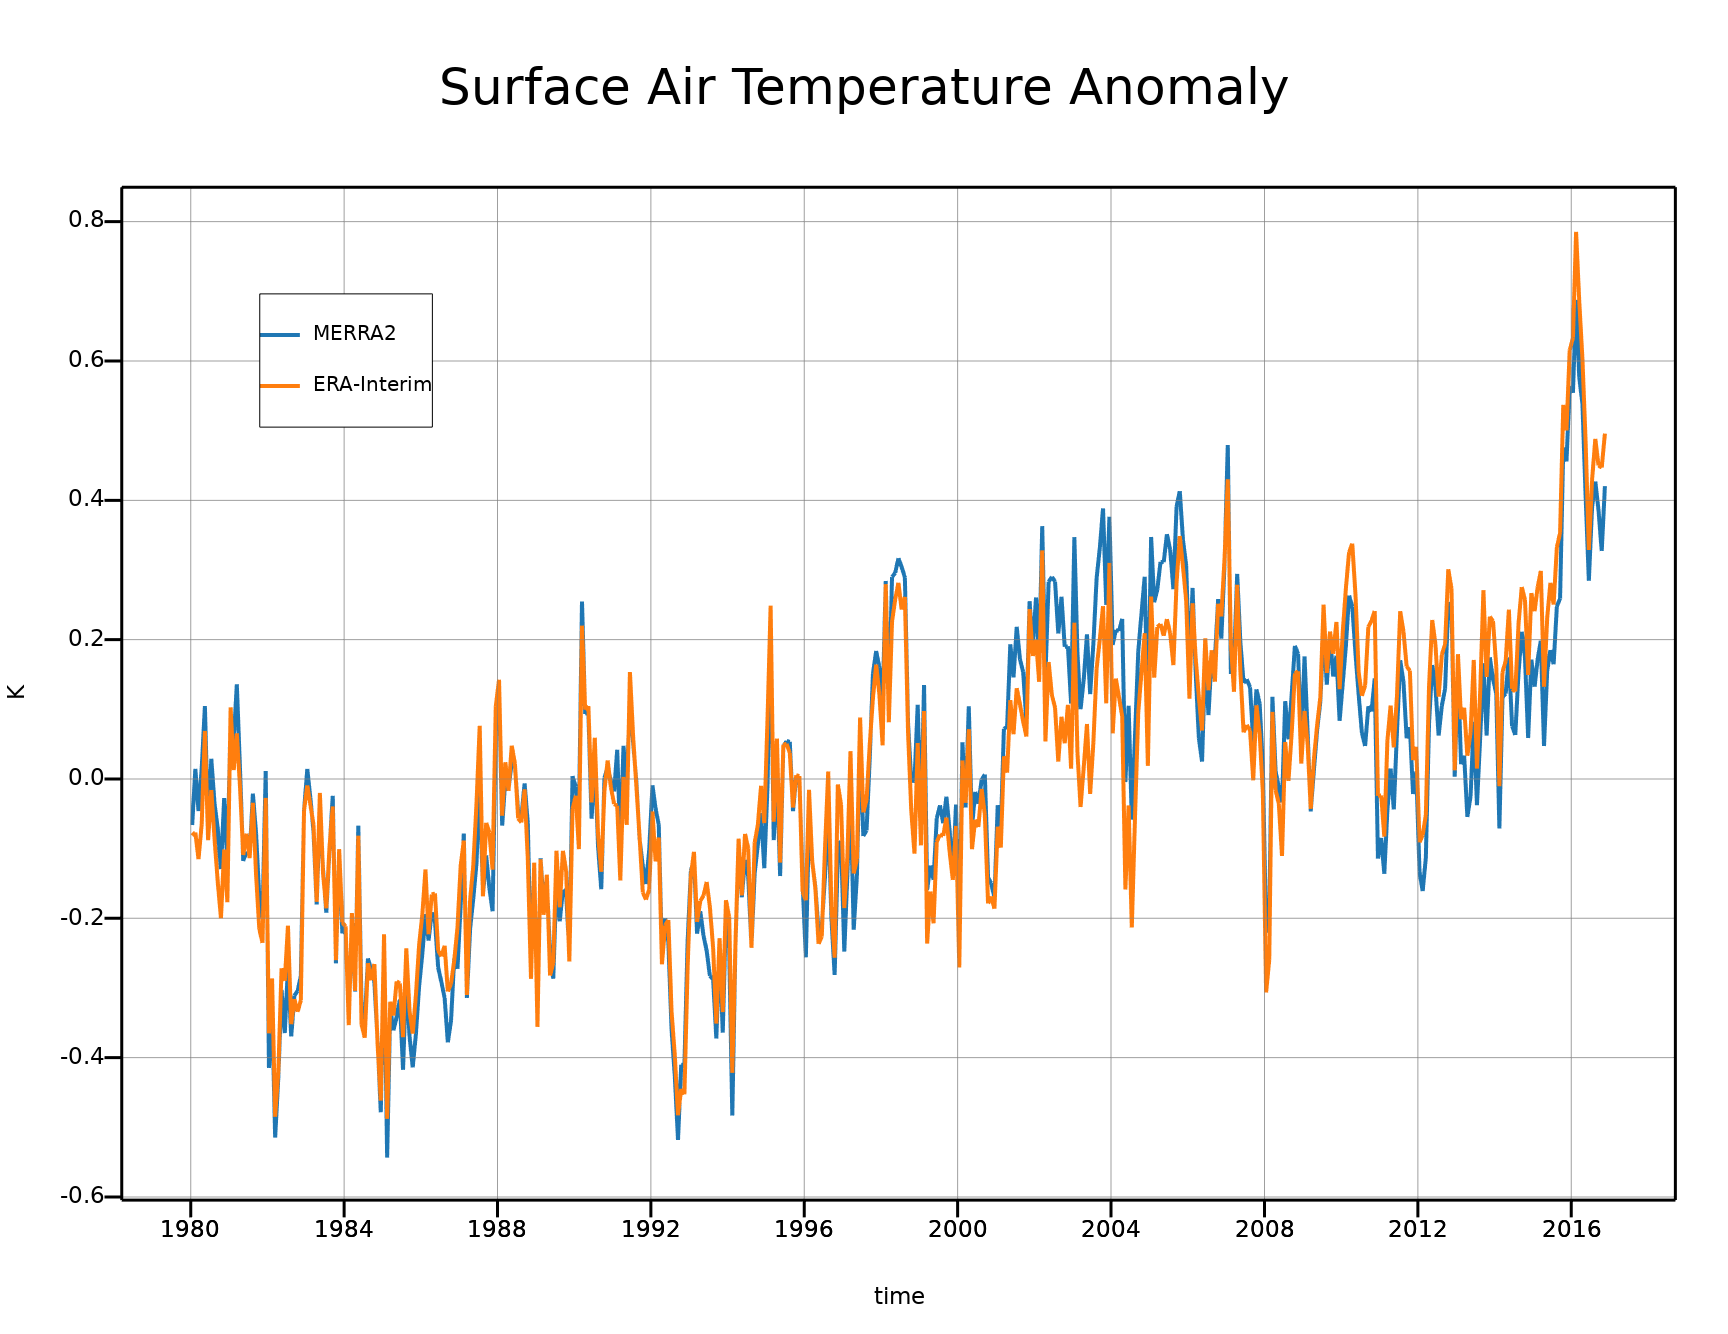

In [2]:
import os
import vcs
import cdms2
import vcsaddons.EzPlot
import cdutil
import time

# Let's measure the execution time...
start=time.time()

# Advanced example with EzPlot
    
# This example is based on the example provided by:
# Gerald L. (Jerry) Potter Ph.D.
# Data and Analysis Consultant
# Phone: 707 315-8314
# email: jerry.potter@gmail.com

# Creates the base canvas
canvas = vcs.init()
canvas.drawlogooff()

# customize the variable name and the description of the plot
varin = 'tas'
# give the new variable (Surface Temperature Anomaly) a name
varid = 'Surface Air Temperature Anomaly'

# set a fixed minimum and maximum for the plot
plotmin = -.6
plotmax = .6

# set units
units='K'

# set the latiude range for the plot
lat1 = -90
lat2 = 90

# go to https://dataserver.nccs.nasa.gov/thredds/catalog/bypass/CREATE-IP/catalog.html
# this example selects data from MERRA2 and ERA-Interim reanalyses
#file1='https://dataserver.nccs.nasa.gov/thredds/dodsC/bypass/CREATE-IP/reanalysis/MERRA2/mon/atmos/tas.ncml'
#file2='https://dataserver.nccs.nasa.gov/thredds/dodsC/bypass/CREATE-IP/reanalysis/ECMWF/mon/atmos/tas.ncml'
file1 = 'tas1.ncml'
file2 = 'tas2.ncml'

# set end data of the data time period is the most recent data in the catalogue
end_date = '2016-12-16'

# min and max clt -4 +6, pr -.4 +.4 multiplier 86400, prw -2 +2, tas -.5 .5

# open the file from the OPENDAP address
f1 = cdms2.open(file1)

# read the variable (end date can be a date like '1989-01-16')
tas1 = f1(varin,lat=(lat1,lat2),time=('1980-01-16',end_date))
t = tas1.getTime()
cdutil.setTimeBoundsMonthly(tas1)

# Calculate temperature anomaly
tas1 = cdutil.times.ANNUALCYCLE.departures(tas1)

# Calculate global average
tas1 = cdutil.averager(tas1(squeeze=1),axis='xy')

# Do the same for the second reanalysis
f2 = cdms2.open(file2)
tas2 = f2(varin,lat=(lat1,lat2),time=('1980-01-16',end_date))
cdutil.setTimeBoundsMonthly(tas2)
tas2 = cdutil.times.ANNUALCYCLE.departures(tas2)
tas2 = cdutil.averager(tas2(squeeze=1),axis="xy")

# reset variable ID
tas1.id = ''
tas2.id = ''

# Creates the plot object
plotfunction = vcsaddons.EzPlot.EzLinePlot()

# Customize the lines used to draw the plots
line_types  = ["solid", "solid"]
line_widths = [4, 4]

# Customize the markers drawn
marker_type = ["dot", "dot"]

# Customize Legend Text
legend_texts = ["MERRA2", "ERA-Interim"]
legend_text_colors = ['black', 'black']

# We can let EzPlot selecting the line colors for us
# or we can also define them
line_colors = [[12.2, 46.7, 70.6], [100.0, 49.8, 5.5]]

# Uses EzPlot to build our plot:
d = plotfunction.lineplot(data=[tas1, tas2], canvas=canvas,
                          line=None, linetypes=line_types, linewidths=line_widths, linecolors=line_colors,
                          markertypes=marker_type,
                          title=varid, left_label=units,
                          legendbackgroundcolor="white", legendtextcolors=legend_text_colors, 
                          legendtexts=legend_texts,
                          enablegrid=True)

#save plot on your computer
canvas.png('EzPlot_Jerry')

# check time for the plotting operations
end = time.time()
print 'time elapsed = ',(end-start)/60, 'minutes'

d
